In [1]:
# Importo librerias

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Abro dataset
df = pd.read_csv("../data/marketing_campaign_clean.csv")
df.head(3)

,Age,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Complain,Wines,Fruits,...,Acc_Cmp1,Acc_Cmp2,Acc_Cmp3,Acc_Cmp4,Acc_Cmp5,Response,Store,Catalog,Webs,Web_Visist
0,67,Graduate,Single,58138.0,0,2012-09-04,58,False,635,88,...,False,False,False,False,False,True,4,10,8,7
1,70,Graduate,Single,46344.0,2,2014-03-08,38,False,11,1,...,False,False,False,False,False,False,2,1,1,5
2,59,Graduate,Together,71613.0,0,2013-08-21,26,False,426,49,...,False,False,False,False,False,False,10,2,8,4


In [4]:
no_outlier = df.loc[df["Income"]<300000]

In [ ]:
# Configuración global para el color de los ticks
plt.rcParams['xtick.color'] = 'darkgray'  # Ticks del eje X
plt.rcParams['ytick.color'] = 'darkgray'  # Ticks del eje Y

In [ ]:
# Configurar el tema global para todos los gráficos
sns.set_theme(style="ticks", 
              palette="flare", 
              font="calibri", 
              context="notebook")


'sns.set_theme(style="ticks", \n              palette="flare", \n              font="calibri", \n              context="notebook")\n'

# 4.3 ANALISIS MULTIVARIANTE

16. INCOME - EDUCATION - TOTAL_SPENT
17. INCOME - EDUCATION - GOLD
18. INCOME - TOTAL_SPENT - GOLD
19. INCOME - TOTAL_SPENT - MEAT
20. INCOME - TOTAL_SPENT - WINES
21. EDUCATION - TOTAL_SPENT - GOLD
22. EDUCATION - TOTAL_SPENT - MEAT
23. EDUCATION - TOTAL_SPENT - WINES

##### 16. INCOME - EDUCATION - TOTAL_SPENT

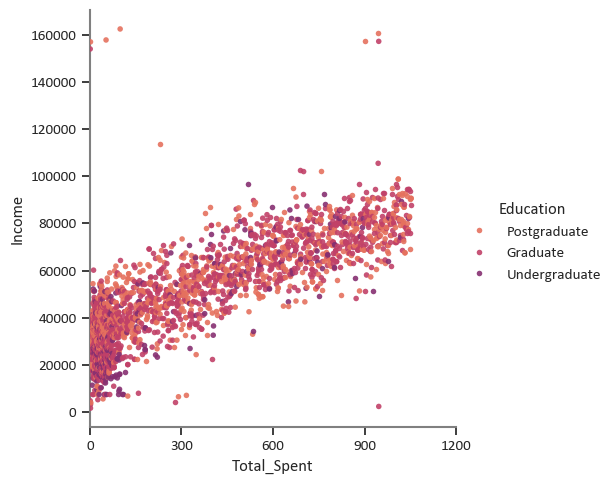

In [95]:
sns.catplot(
    x="Total_Spent", 
    y="Income", 
    hue="Education", 
    data=no_outlier, 
    kind="strip",
    size = 4,
    hue_order=["Postgraduate","Graduate", "Undergraduate"],
    alpha=0.9,
    palette="flare"
    )

plt.xticks(ticks=[0, 300, 600 , 900 , 1200], 
           labels=["0", "300", "600", "900", "1200"]);

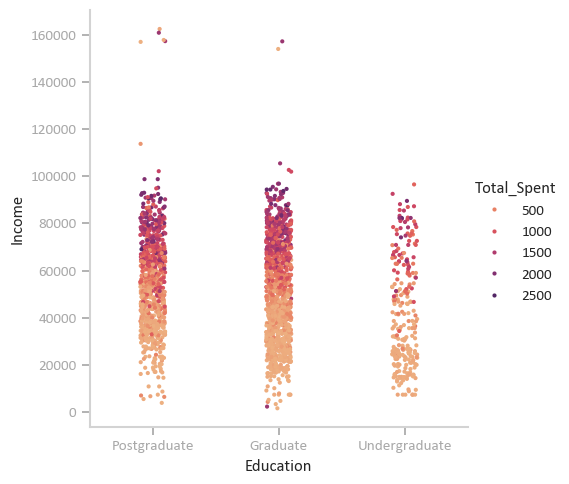

In [137]:
sns.catplot(
    x="Education", 
    y="Income", 
    hue="Total_Spent", 
    data=no_outlier, 
    kind="strip",
    order=["Postgraduate", "Graduate", "Undergraduate"],
    hue_norm=(0, 2600),
    size = 3,
    palette="flare"  #| https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    );

- A mayores ingresos mayor gasto total
- Los que mas gastan / ingresas son aquellos que tienen tienen estudios superiores

Respuesta Graduate:


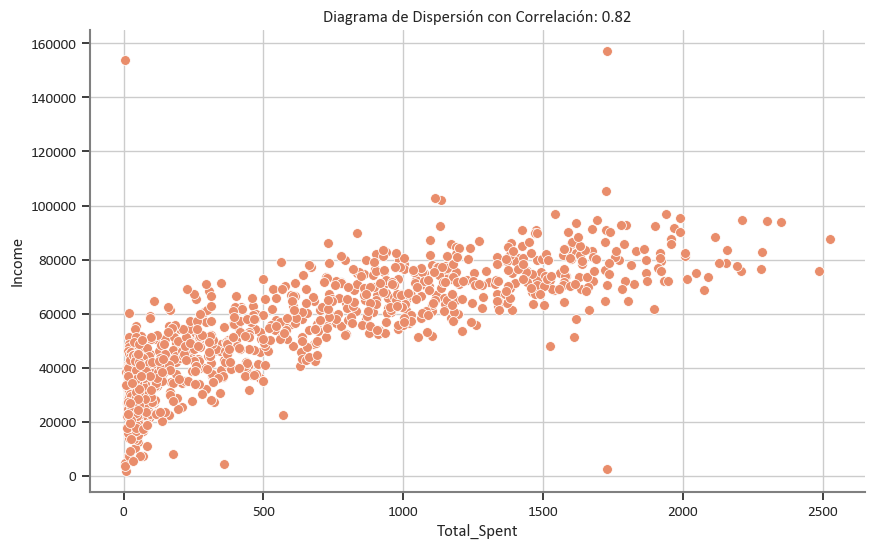

Respuesta Postgraduate:


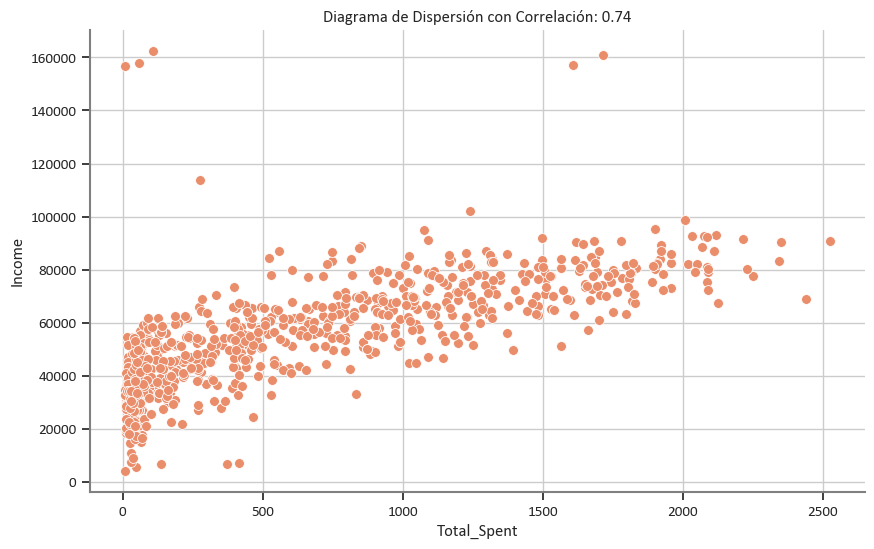

Respuesta Undergraduate:


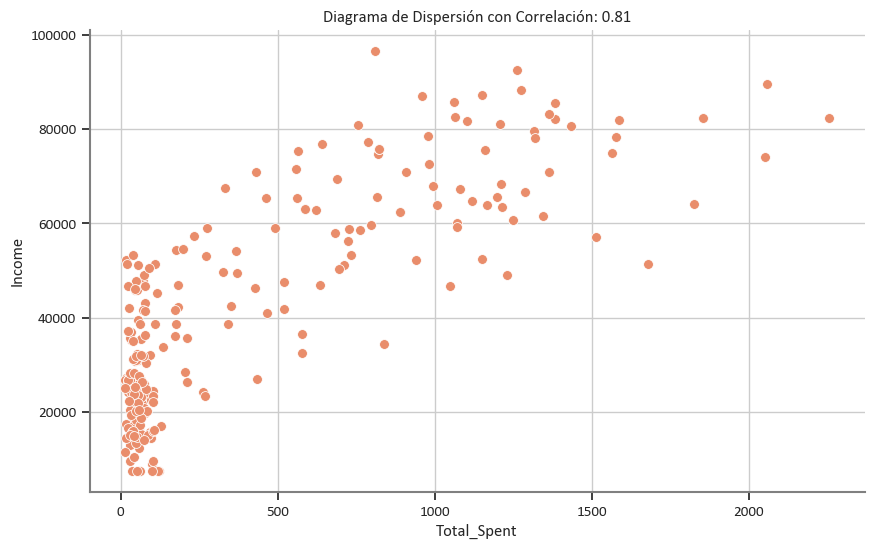

In [97]:
col_directora = "Education" 
col_1 = "Income" # target
col_2 = "Total_Spent" 
diccionario_multivariante = {}
for valor in no_outlier[col_directora].unique():
    diccionario_multivariante[valor] = no_outlier.loc[no_outlier[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=50, mostrar_correlacion= True)

Se confirma la correlacion entre INCOME - TOTAL_SPENT para cada categoria de EDUCATION

##### 17. INCOME - EDUCATION - GOLD

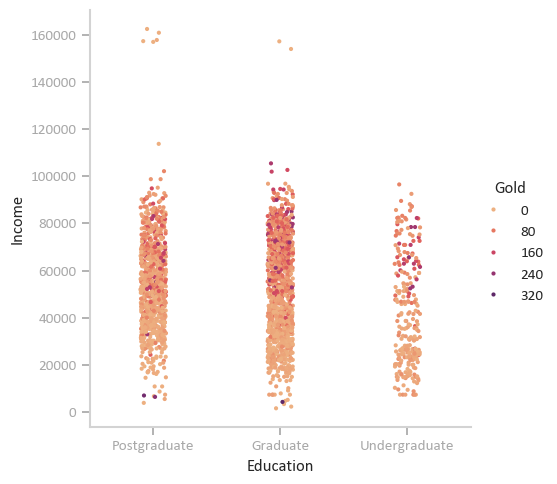

In [141]:
sns.catplot(
    x="Education", 
    y="Income", 
    hue="Gold", 
    data=no_outlier, 
    kind="strip",
    order=["Postgraduate", "Graduate", "Undergraduate"],
    hue_norm=(0, 350),
    size = 3,
    palette="flare"  #| https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    );

Respuesta Graduate:


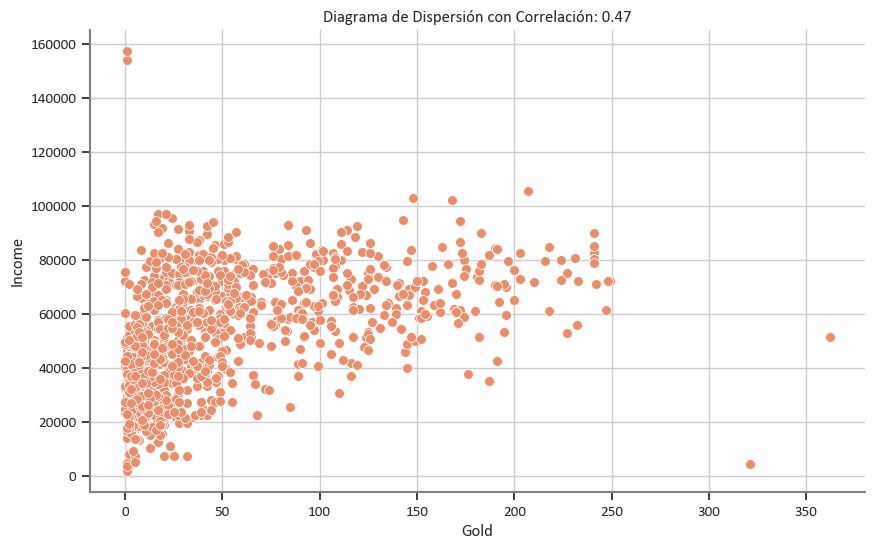

Respuesta Postgraduate:


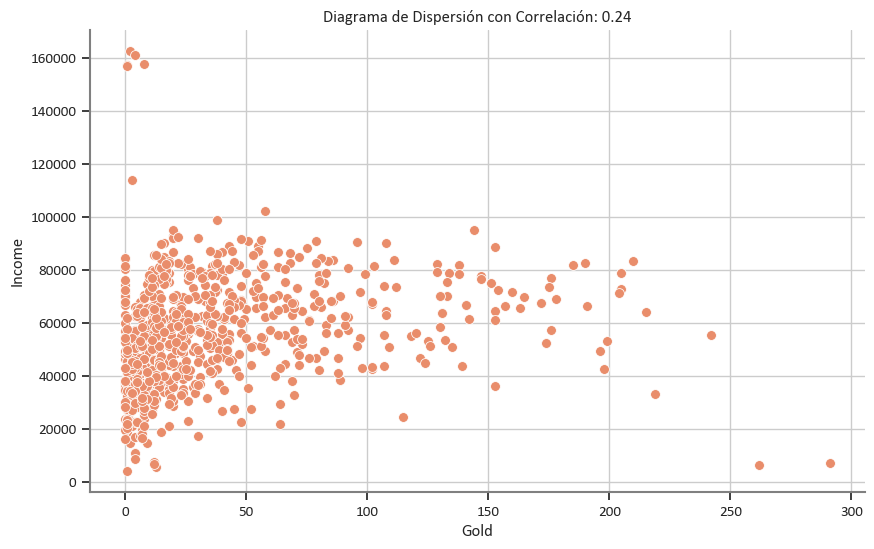

Respuesta Undergraduate:


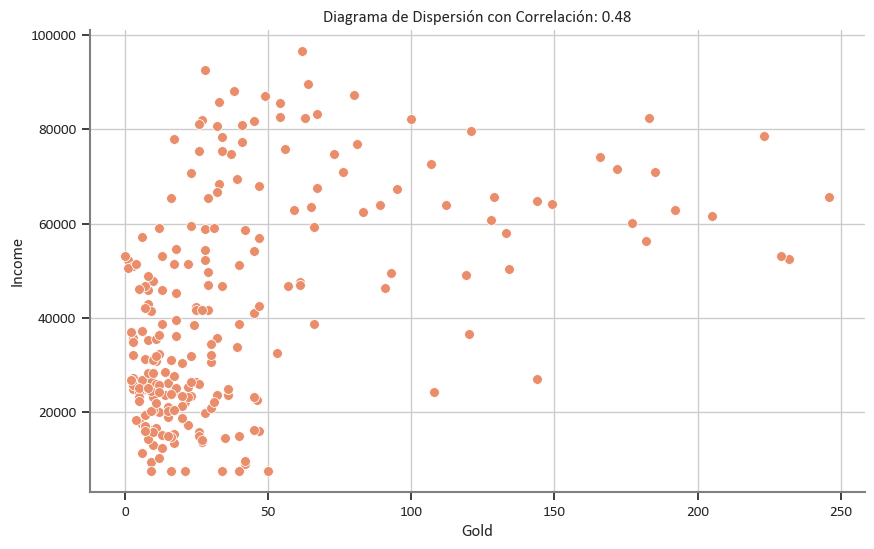

In [99]:
col_directora = "Education" 
col_1 = "Income" # target
col_2 = "Gold" 
diccionario_multivariante = {}
for valor in no_outlier[col_directora].unique():
    diccionario_multivariante[valor] = no_outlier.loc[no_outlier[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=50, mostrar_correlacion= True)

##### 18. INCOME - TOTAL_SPENT - GOLD

(3, 2)


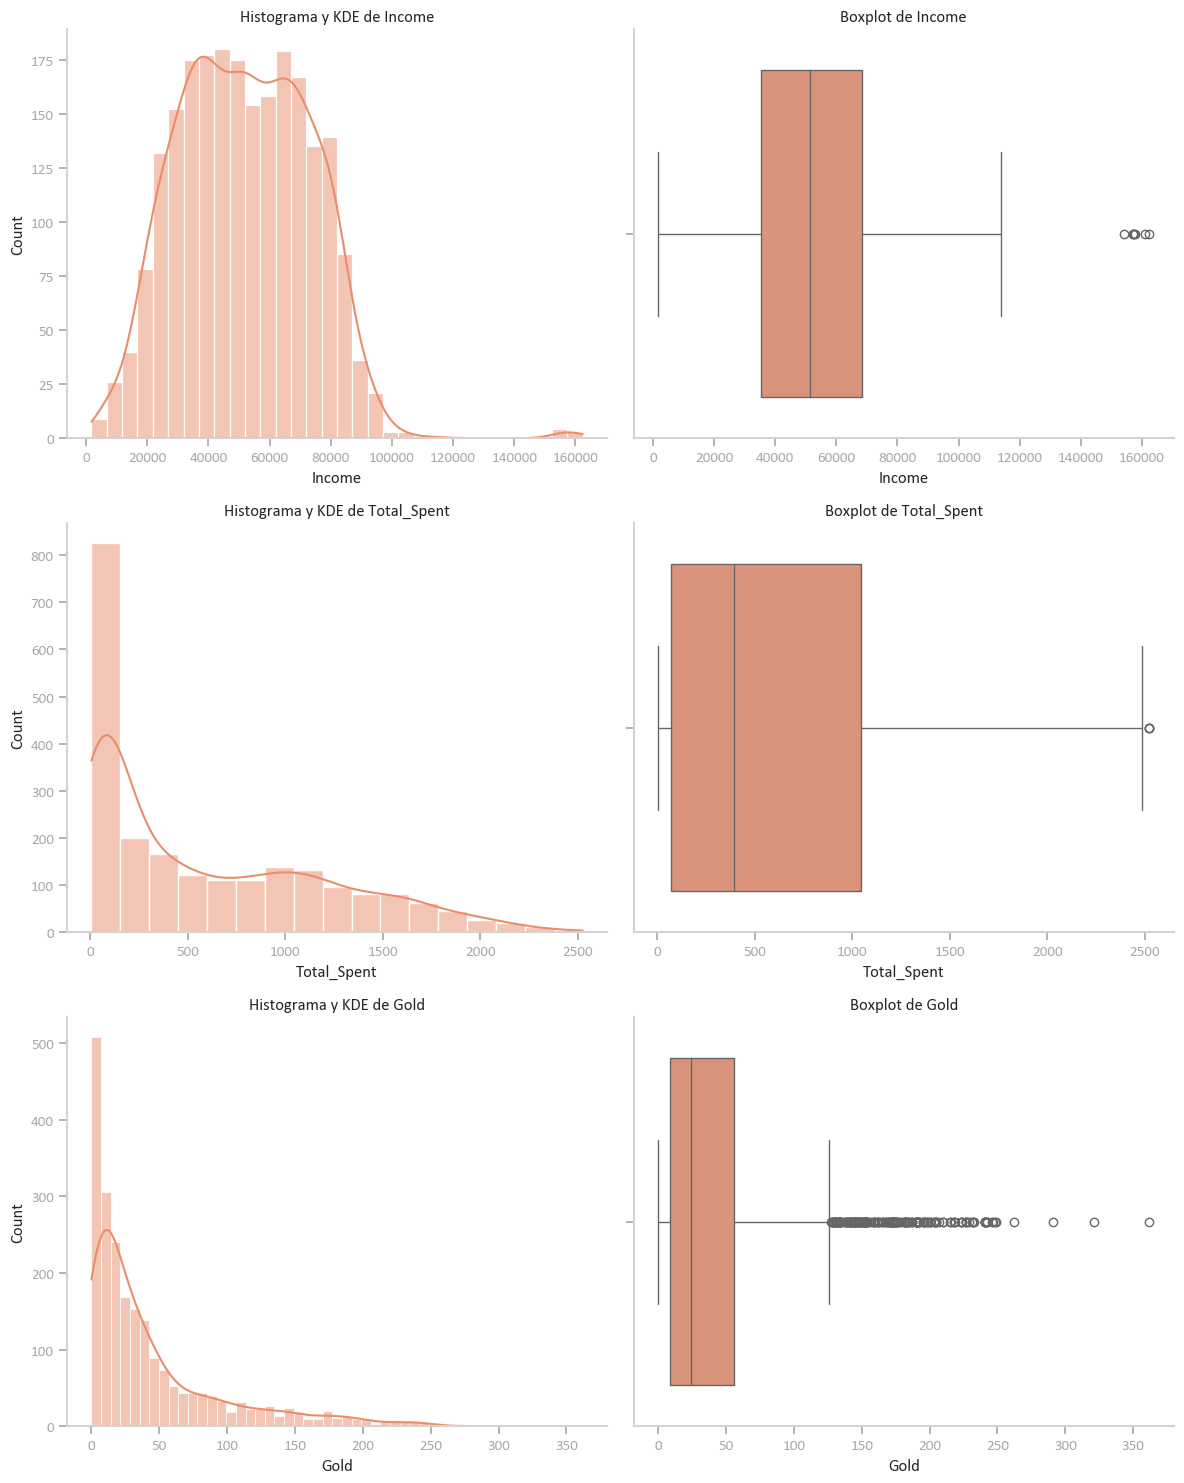

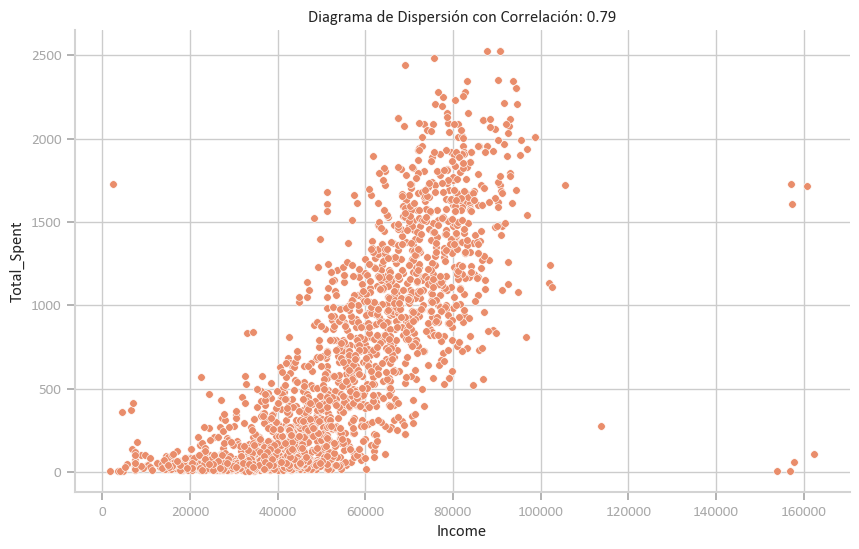

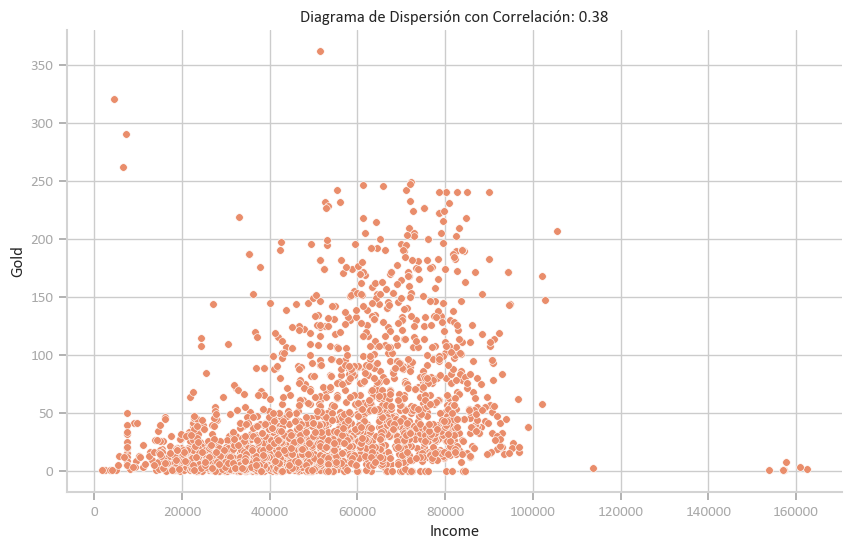

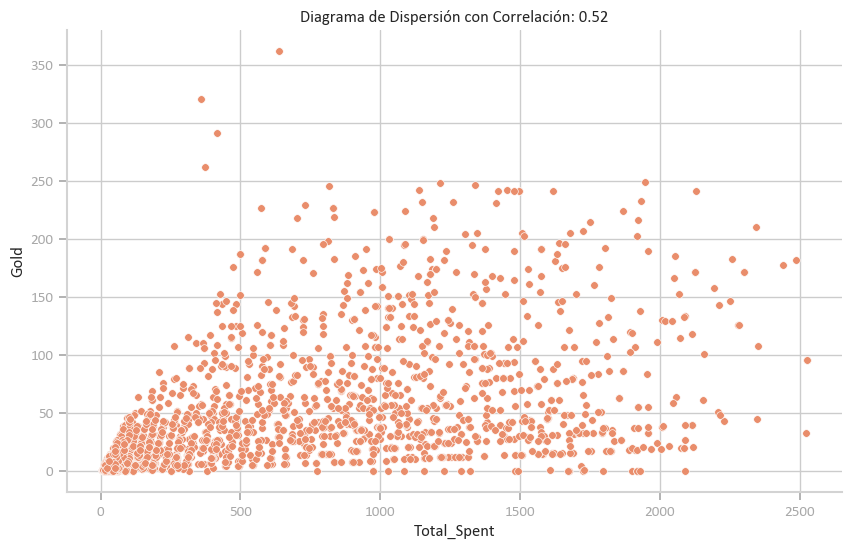

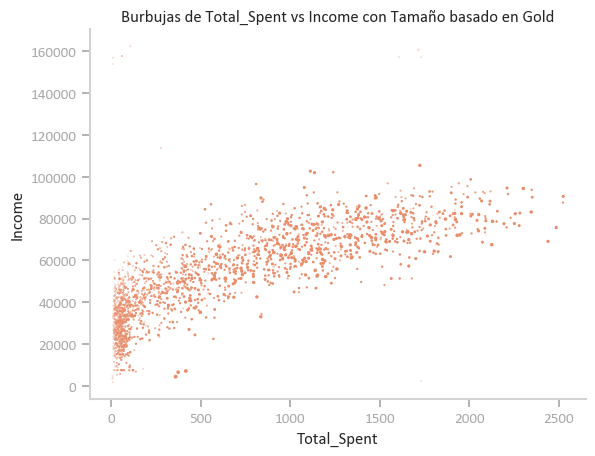

In [132]:
plot_combined_graphs(no_outlier,["Income","Total_Spent","Gold"])

grafico_dispersion_con_correlacion(no_outlier,"Income","Total_Spent", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Income","Gold", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Total_Spent","Gold", mostrar_correlacion= True, tamano_puntos= 30)

bubble_plot(no_outlier, 
            col_x = "Total_Spent", 
            col_y ="Income", 
            col_size="Gold", 
            scale=100)

##### 19. INCOME - TOTAL_SPENT - MEAT

(3, 2)


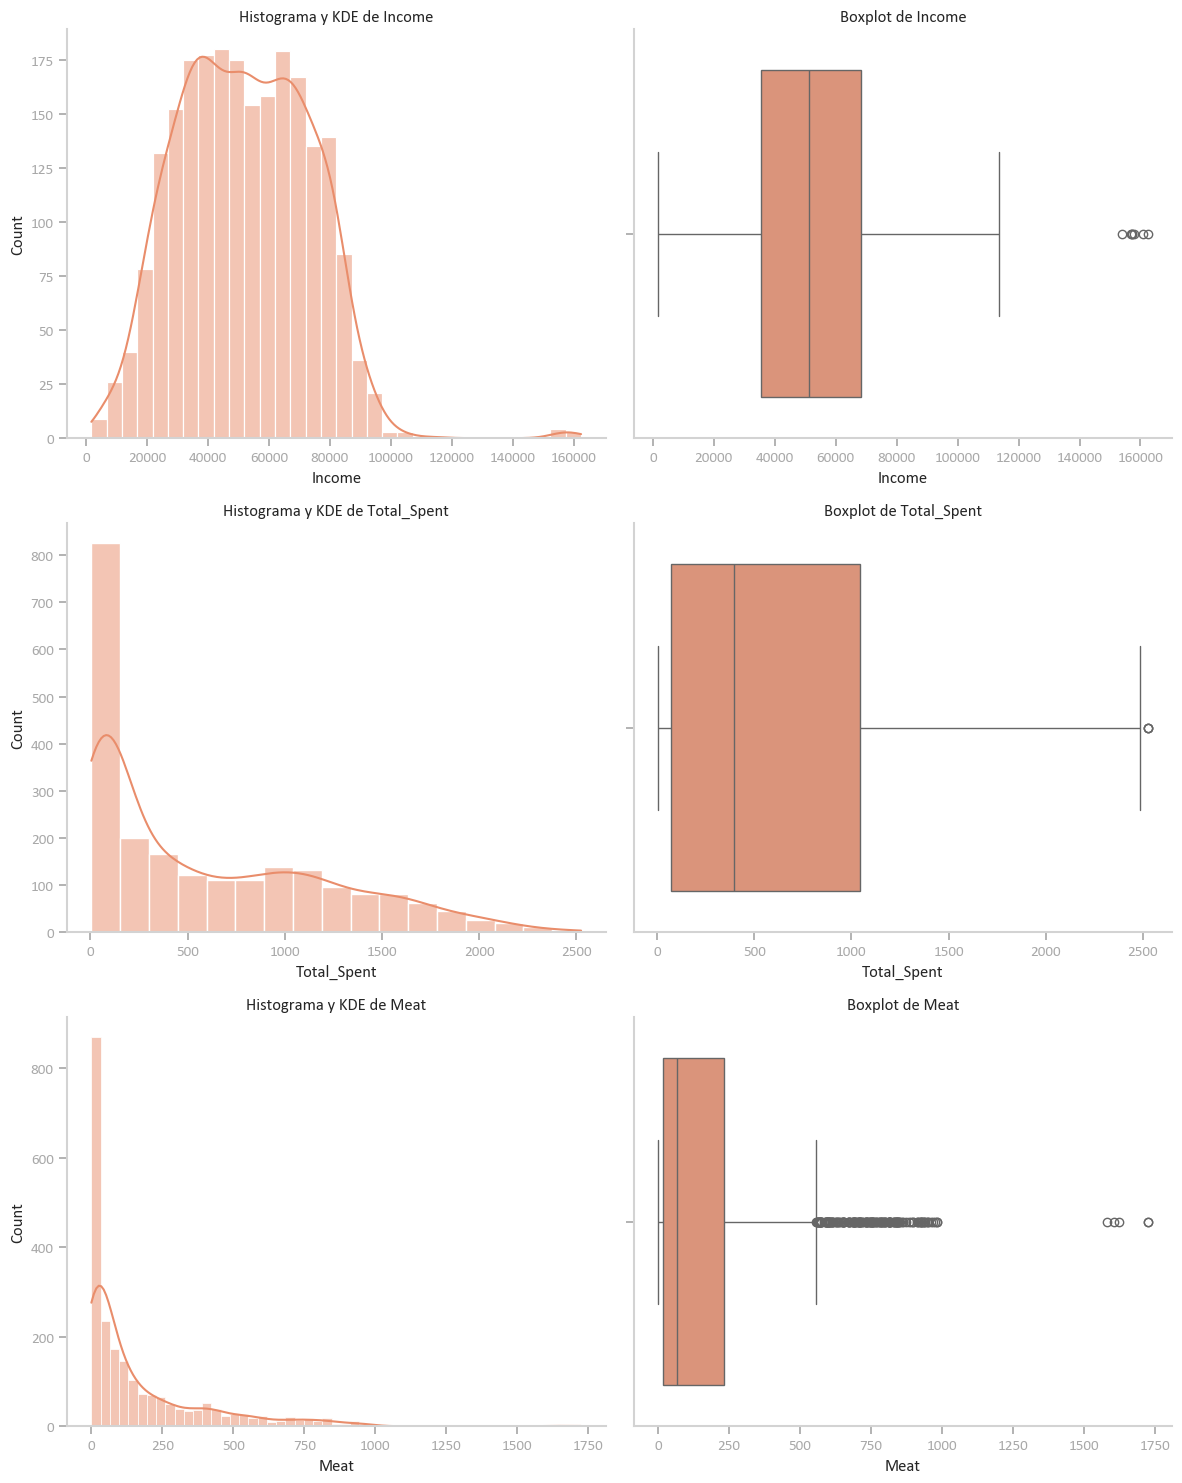

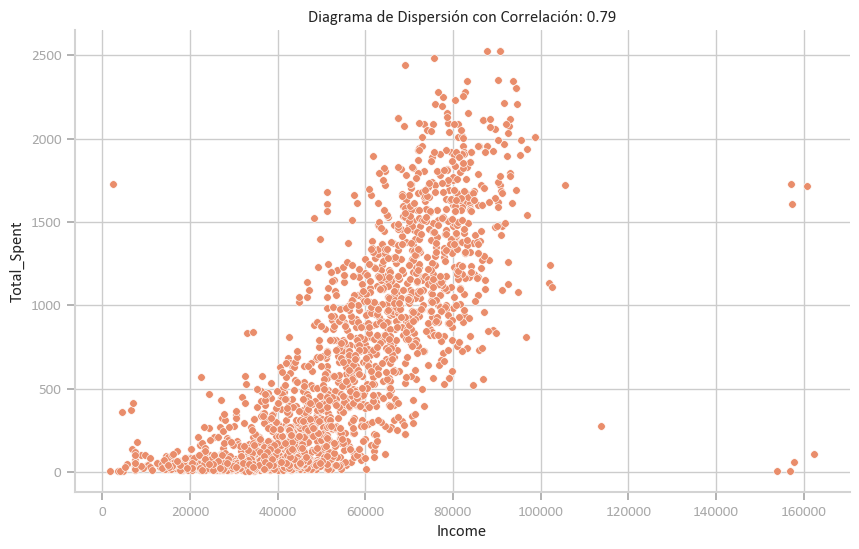

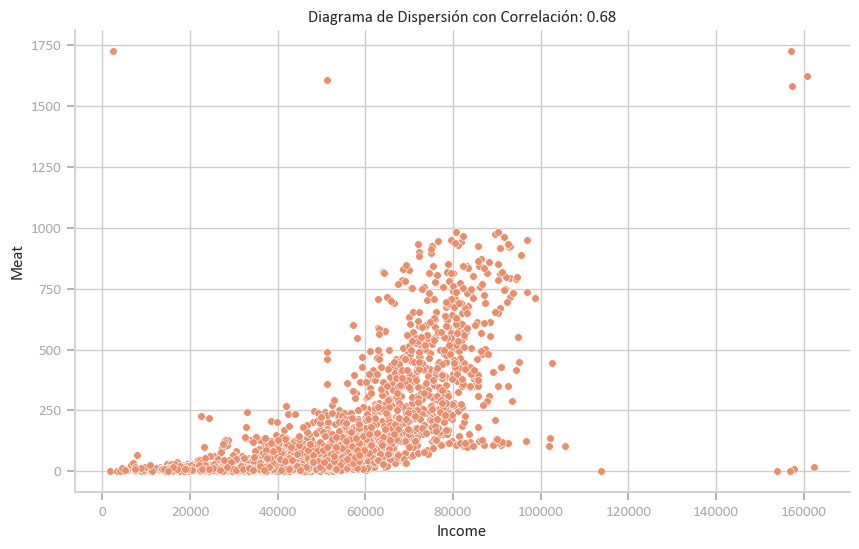

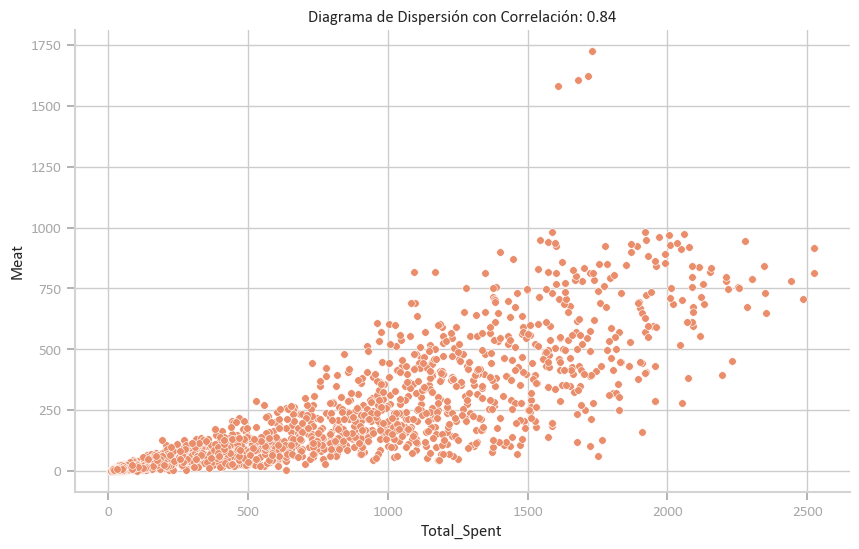

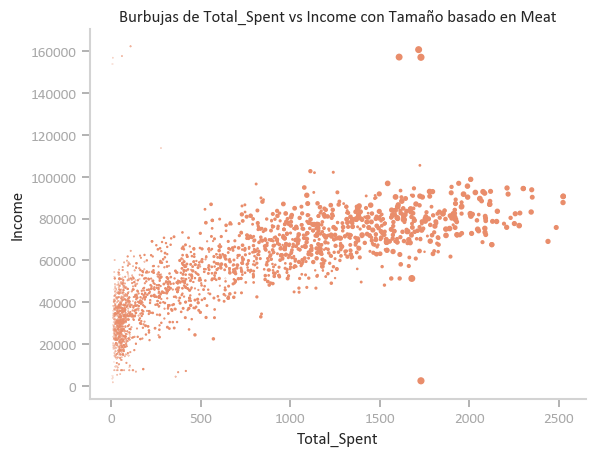

In [133]:
plot_combined_graphs(no_outlier,["Income","Total_Spent","Meat"])

grafico_dispersion_con_correlacion(no_outlier,"Income","Total_Spent", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Income","Meat", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Total_Spent","Meat", mostrar_correlacion= True, tamano_puntos= 30)

bubble_plot(no_outlier, 
            col_x = "Total_Spent", 
            col_y ="Income", 
            col_size="Meat", 
            scale=100)

##### 20. INCOME - TOTAL_SPENT - WINES

(3, 2)


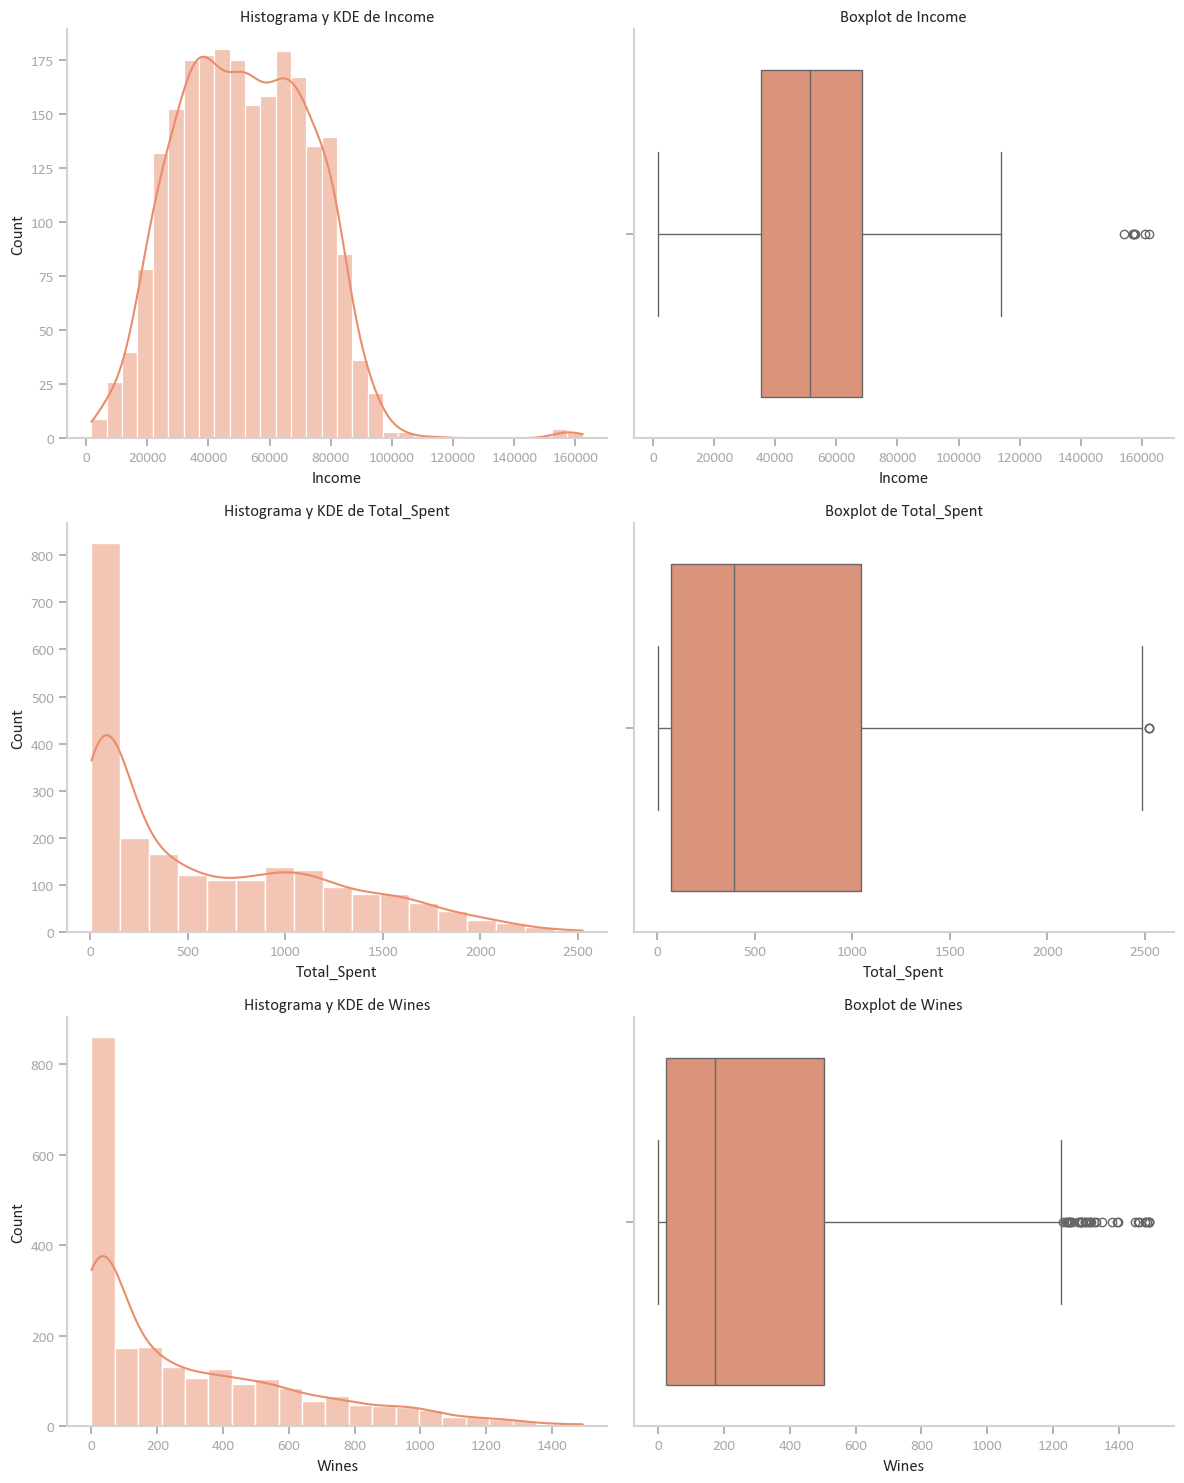

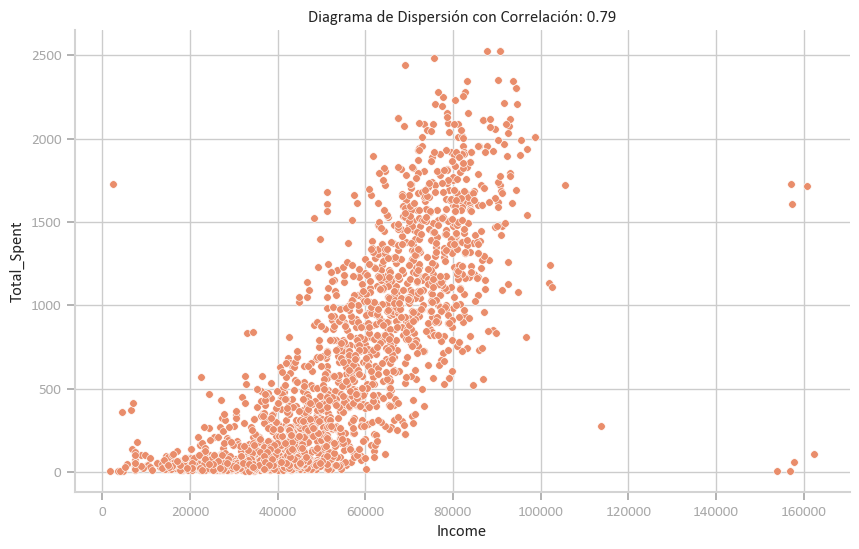

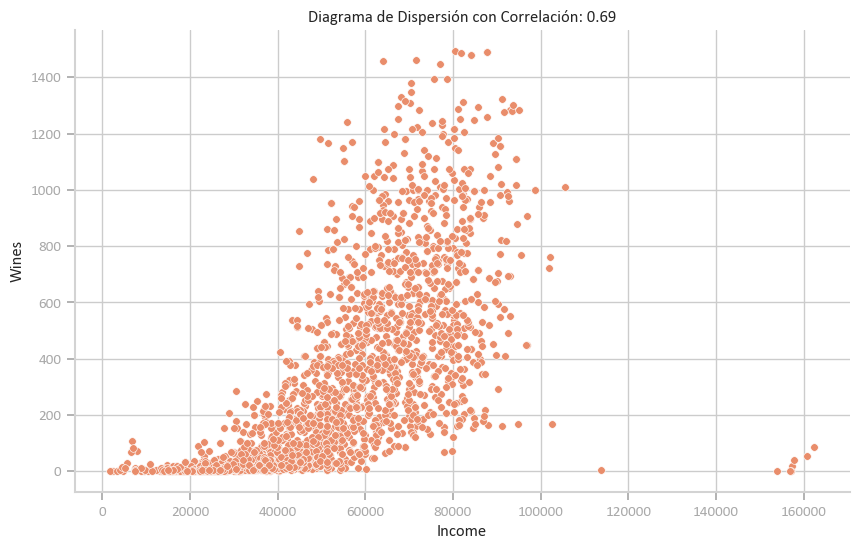

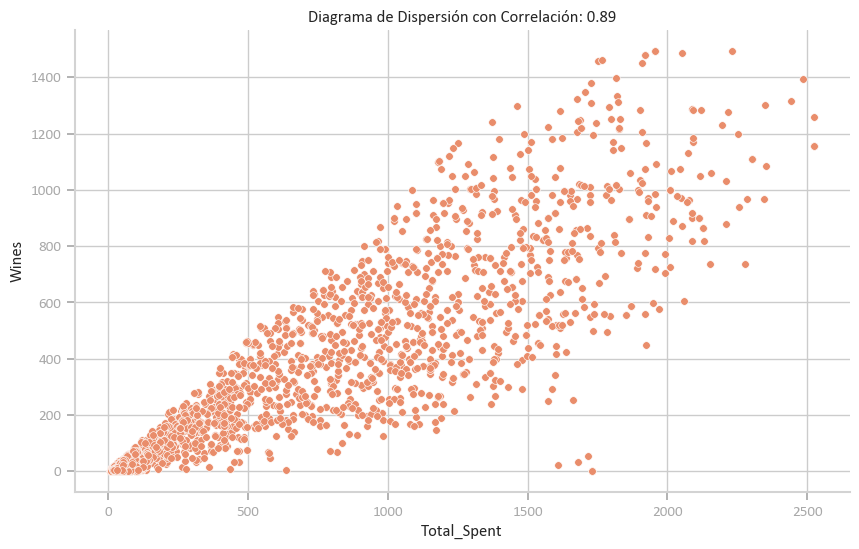

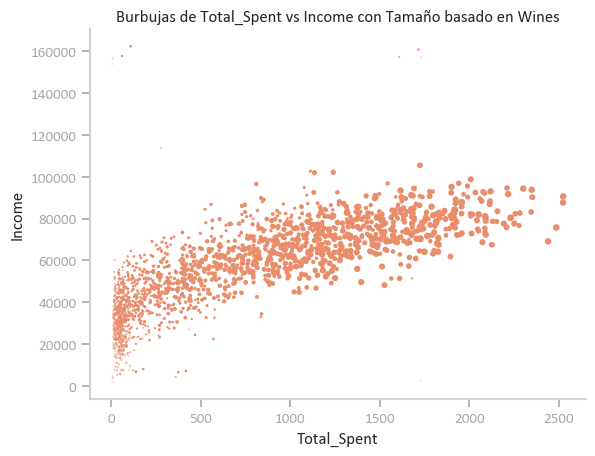

In [135]:
plot_combined_graphs(no_outlier,["Income","Total_Spent","Wines"])

grafico_dispersion_con_correlacion(no_outlier,"Income","Total_Spent", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Income","Wines", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(no_outlier,"Total_Spent","Wines", mostrar_correlacion= True, tamano_puntos= 30)

bubble_plot(no_outlier, 
            col_x = "Total_Spent", 
            col_y ="Income", 
            col_size="Wines", 
            scale=100)

##### 21. EDUCATION - TOTAL_SPENT - GOLD

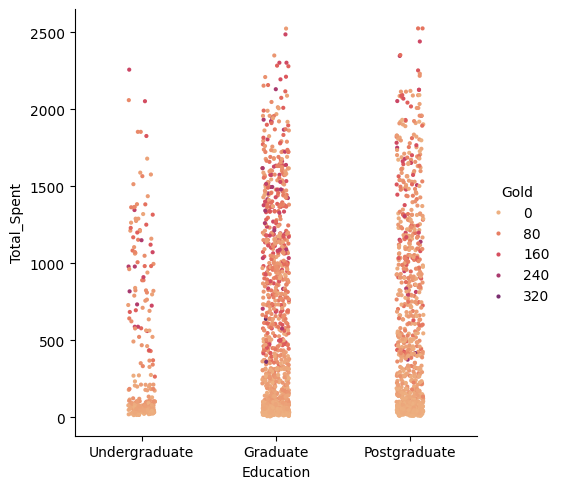

In [6]:
sns.catplot(
    x="Education", 
    y="Total_Spent", 
    hue="Gold", 
    data=no_outlier, 
    kind="strip",
    order=["Undergraduate", "Graduate", "Postgraduate"],
    hue_norm=(0, 400),
    size = 3,
    palette="flare"  #| https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    );

Respuesta Graduate:


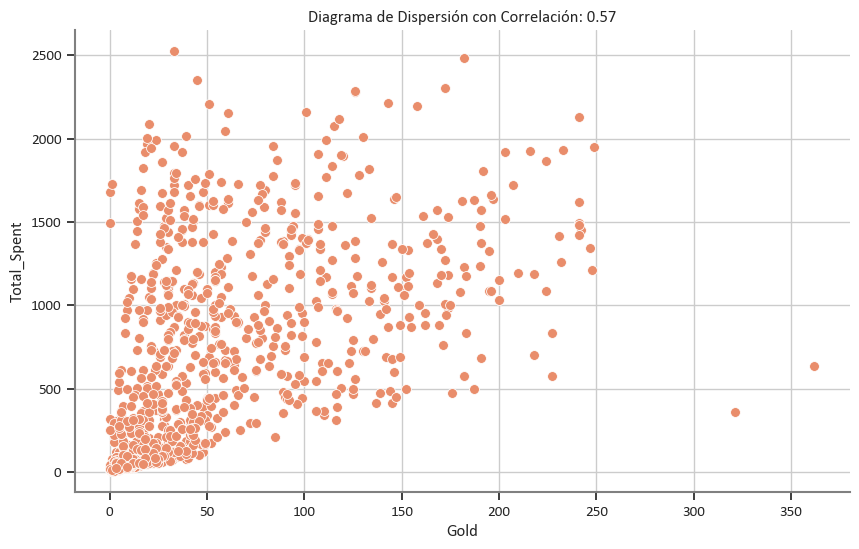

Respuesta Postgraduate:


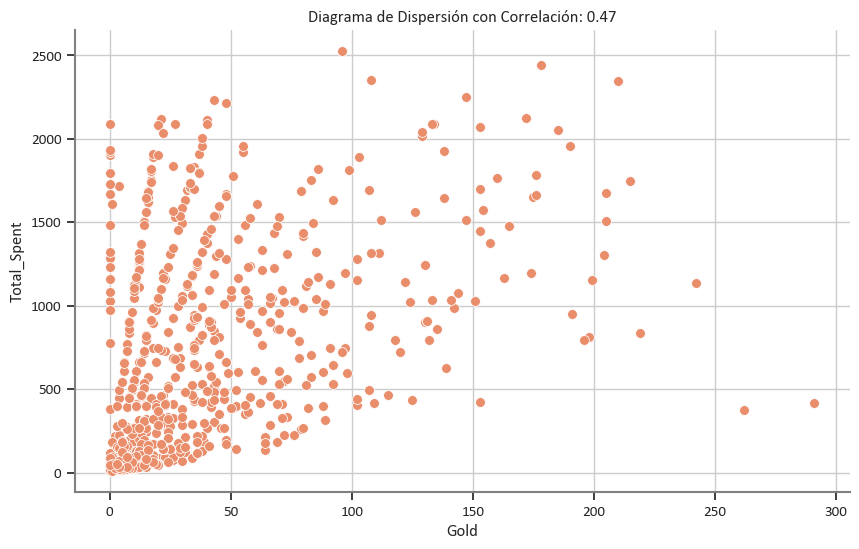

Respuesta Undergraduate:


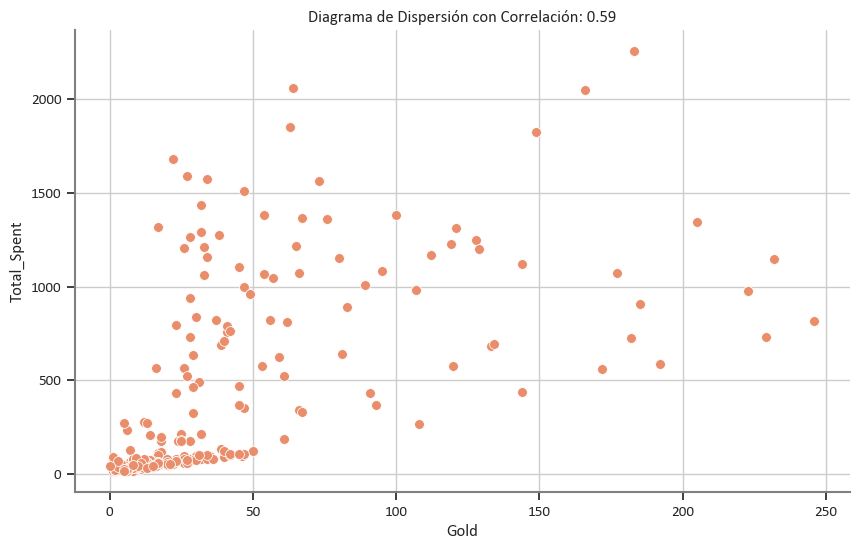

In [104]:
col_directora = "Education" 
col_1 = "Total_Spent" 
col_2 = "Gold" 
diccionario_multivariante = {}
for valor in no_outlier[col_directora].unique():
    diccionario_multivariante[valor] = no_outlier.loc[no_outlier[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=50, mostrar_correlacion= True)

##### 22. EDUCATION - TOTAL_SPENT - MEAT

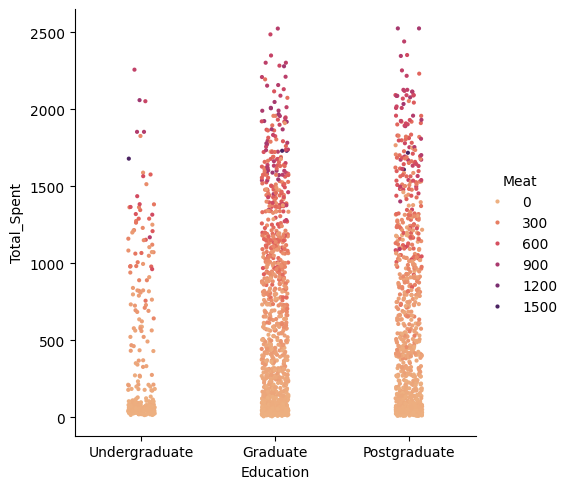

In [7]:
sns.catplot(
    x="Education", 
    y="Total_Spent", 
    hue="Meat", 
    data=no_outlier, 
    kind="strip",
    order=["Undergraduate", "Graduate", "Postgraduate"],
    hue_norm=(0, 1500),
    size = 3,
    palette="flare" # | https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    );

Respuesta Graduate:


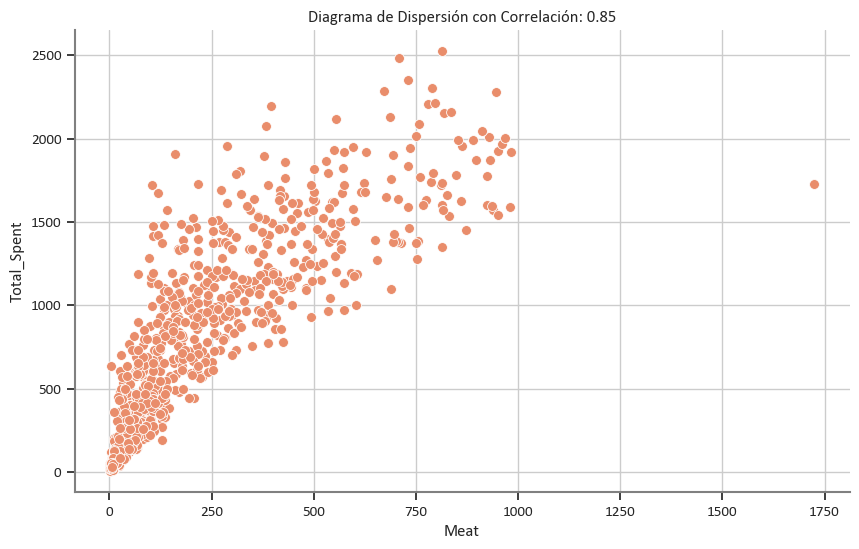

Respuesta Postgraduate:


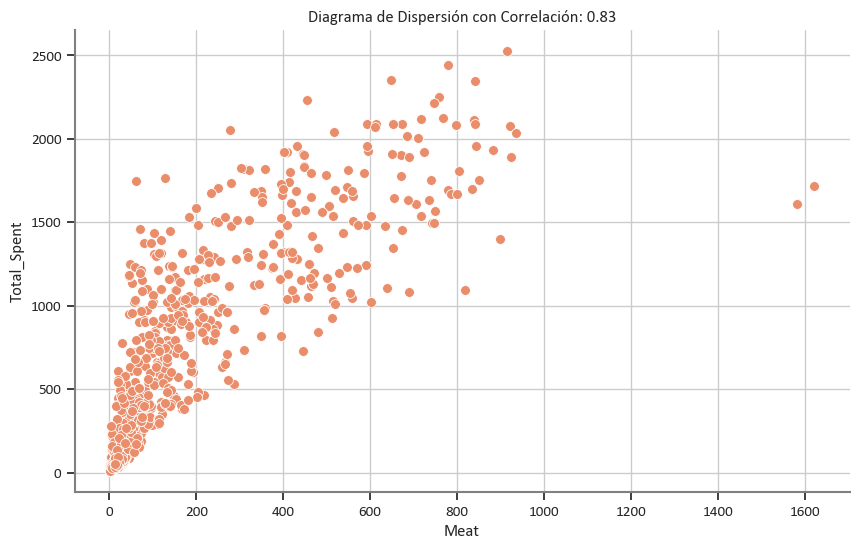

Respuesta Undergraduate:


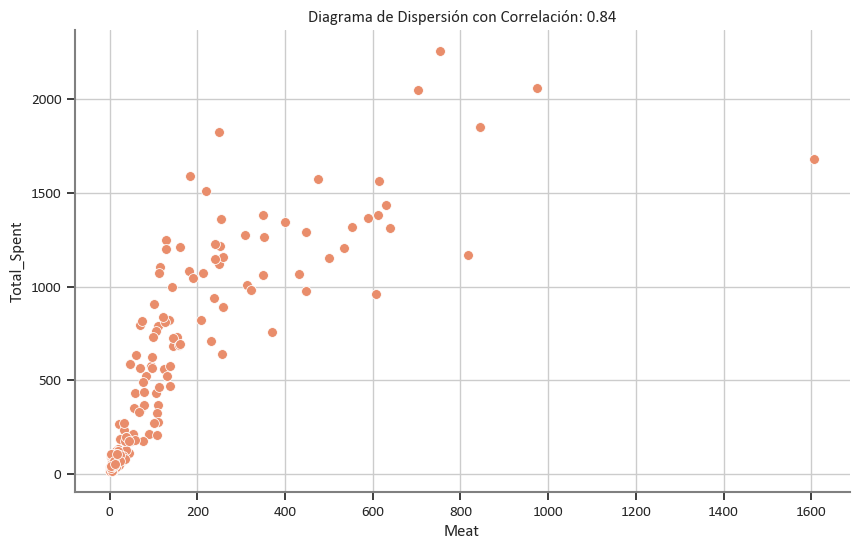

In [106]:
col_directora = "Education" 
col_1 = "Total_Spent" 
col_2 = "Meat" 
diccionario_multivariante = {}
for valor in no_outlier[col_directora].unique():
    diccionario_multivariante[valor] = no_outlier.loc[no_outlier[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=50, mostrar_correlacion= True)

##### 23. EDUCATION - TOTAL_SPENT - WINES

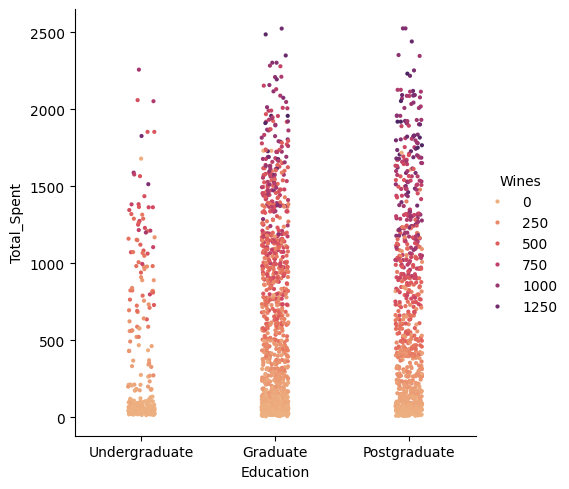

In [8]:
sns.catplot(
    x="Education", 
    y="Total_Spent", 
    hue="Wines", 
    data=no_outlier, 
    kind="strip",
    order=["Undergraduate", "Graduate", "Postgraduate"],
    hue_norm=(0, 1500),
    size = 3,
    palette="flare" # | https://www.practicalpythonfordatascience.com/ap_seaborn_palette
    );

Respuesta Graduate:


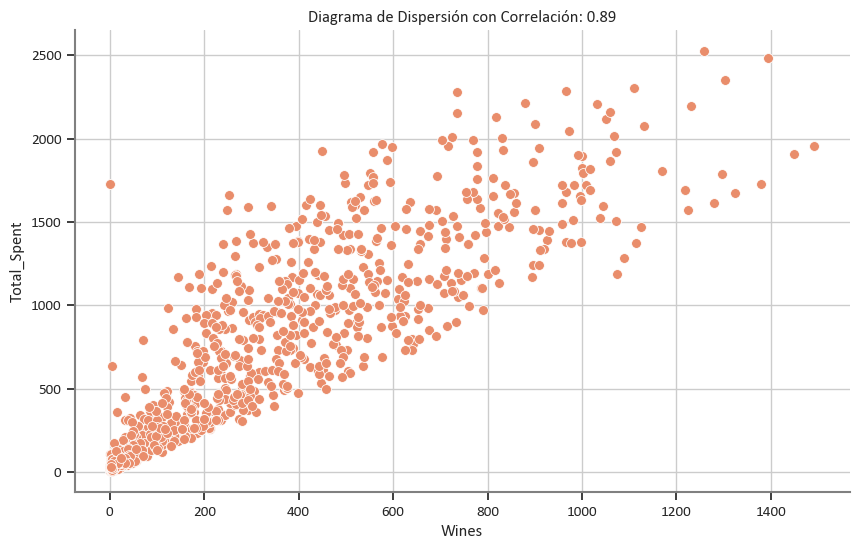

Respuesta Postgraduate:


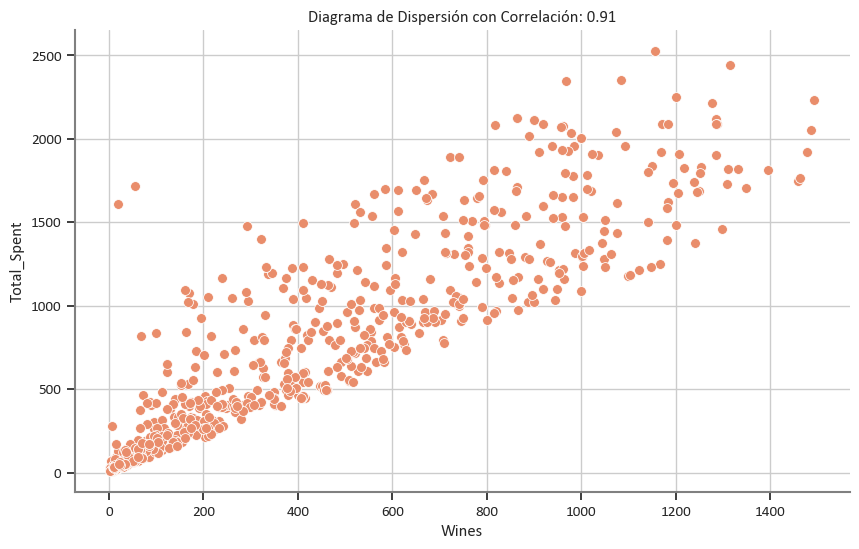

Respuesta Undergraduate:


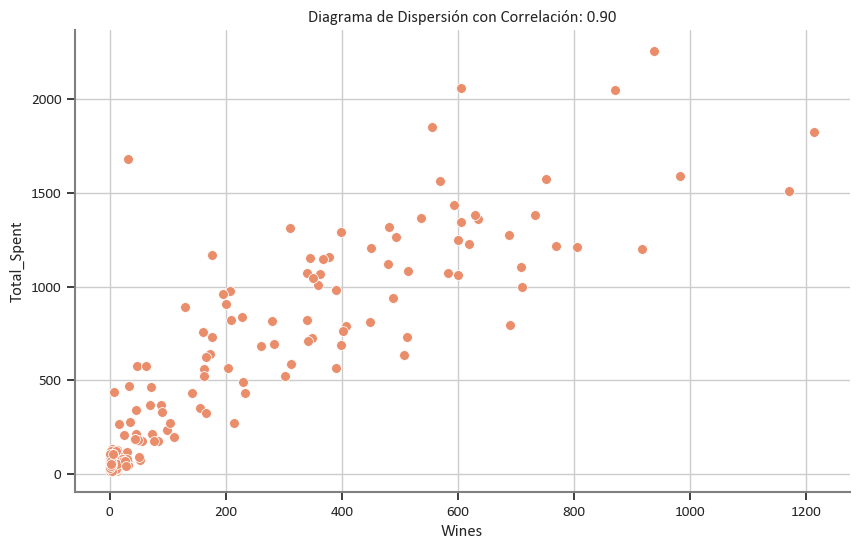

In [108]:
col_directora = "Education" 
col_1 = "Total_Spent" 
col_2 = "Wines" 
diccionario_multivariante = {}
for valor in no_outlier[col_directora].unique():
    diccionario_multivariante[valor] = no_outlier.loc[no_outlier[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=50, mostrar_correlacion= True)

In [109]:
df_reduced = df[["Age", "Income", "Education", "Marital_Status", "Recency",
               "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Total_Spent",
               ]]
df_reduced2 = df[["Income", "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Total_Spent",
               ]]
df_reduced2

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Spent
0,58138.0,635,88,546,172,88,88,1617
1,46344.0,11,1,6,2,1,6,27
2,71613.0,426,49,127,111,21,42,776
3,26646.0,11,4,20,10,3,5,53
4,58293.0,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,1341
2236,64014.0,406,0,30,0,0,8,444
2237,56981.0,908,48,217,32,12,24,1241
2238,69245.0,428,30,214,80,30,61,843


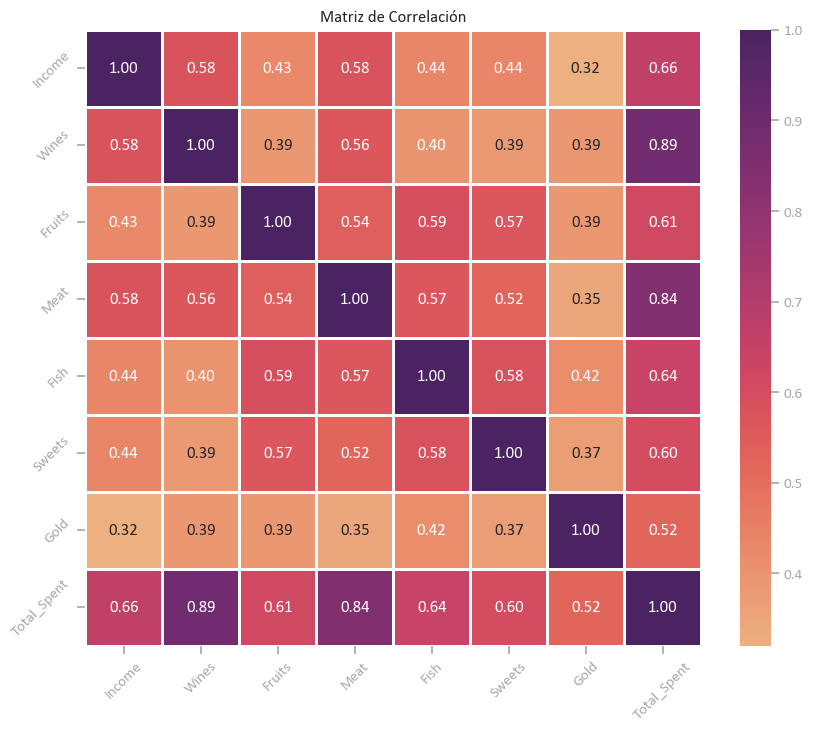

In [145]:
corr_matrix = df_reduced2.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará
corr_matrix

plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="flare", 
            cbar=True, square=True, linewidths=2) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()